## Tarea: Tensor Flow y Keras

**Nombre:** Kevin Fabricio Calle Urgilez

**Asignatura:** Sistemas Cognitivos Artificiales 

**Fecha:** 15/10/18

# Trabajo 1: Introducción a las redes neuronales con TensorFlow y Keras

En este primer trabajo, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

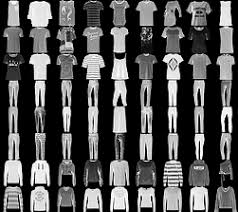

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import matplotlib.pyplot as plt

Using TensorFlow backend.


Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Acto seguido, normalizamos esos datos de manera similar a como hemos visto con MNIST, obteniendo valores entre 0 y 1. Este paso es muy importante para el correcto funcionamiento de nuestra red.

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

** Pregunta 1.1 *(0.5 puntos)* ** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [4]:
### Tu código aquí ###

# Imprimimos en pantalla las dimensiones de los arrays "x_train" y "x_test"

x_train_shape = x_train.shape
x_test_shape = x_test.shape

print("Dimensión de x_train: " + str(x_train_shape))
print("Dimensión de x_test: " + str(x_test_shape)+ "\n")

# Imprimimos en pantalla las dimensiones de un elemento dentro los dos arrays

print("Tamaño de un elemento de x_train[0]: " + str(x_train[1].shape))
print("Tamaño de un elemento de x_test[0]: " + str(x_test[15].shape) + "\n")

# Imprimimos en pantalla el número y tamaño de las imágenes en los arrays "x_train", "x_test"

print("El array de training tiene: " + str(x_train_shape[0]) + " imágenes de tamaño: " + str(x_train_shape[1]) + "x" + str(x_train_shape[2]) + " píxeles")
print("El array de test tiene: " + str(x_test_shape[0]) + " imágenes de tamaño: " + str(x_test_shape[1]) + "x" + str(x_test_shape[2]) + " píxeles")

Dimensión de x_train: (60000, 28, 28)
Dimensión de x_test: (10000, 28, 28)

Tamaño de un elemento de x_train[0]: (28, 28)
Tamaño de un elemento de x_test[0]: (28, 28)

El array de training tiene: 60000 imágenes de tamaño: 28x28 píxeles
El array de test tiene: 10000 imágenes de tamaño: 28x28 píxeles


*Tu respuesta aquí*

**Respuesta:** 

Vemos que en el dataset hay 60000 imágenes de training y 10000 imágenes de test. Es decir, el modelo se entrenará con 60000 muestras y se evaluará con 10000 muestras.

Luego, si tomamos una de los elementos vemos que tiene una dimensión de 28 x 28 píxeles. Por lo tanto podemos concluir que todas las imágenes en el dataset tienen esa dimensión.

**Pregunta 1.2 *(0.5 puntos)* ** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

El tamaño de la imagen ejemplo es: (28, 28) píxeles

DescribeResult(nobs=60000, minmax=(0, 9), mean=4.5, variance=8.250137502291706, skewness=0.0, kurtosis=-1.2242424242424244)
Vemos que hay 10 clases de etiquetas en los datos


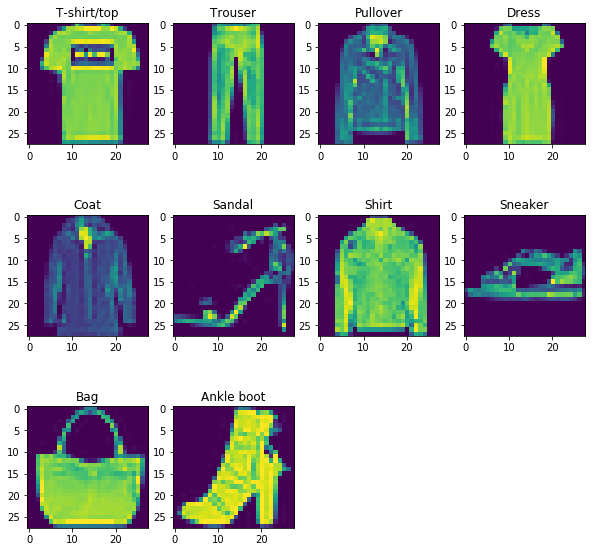

In [5]:
### Tu código aquí ###

import numpy as np
from scipy import stats
import pandas as pd

# Se extrae un example del dataset (del conjunto de x_train) para analizar sus dimensiones

example = x_train[20]
print("El tamaño de la imagen ejemplo es: " + str(example.shape) + " píxeles" + "\n")

# Se analizan las características del conjunto y_train para saber cuántas clases a predecir hay en el dataset
# Vemos que hay valores mínimos de 0 y máximos de 9 con media en 4.5.
# Por lo que se entiende que exixten 10 CLASES a predecir.

print(stats.describe(y_train))
print("Vemos que hay 10 clases de etiquetas en los datos")

# Basándose en la descripción de los datos de Fashion-MNIST en el repositorio de github. Dibujamos un elemento de cada
# clase para entender mejor los tipos de imágenes que vamos a manejar.

fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3

# Se elige un elemento cualquiera de cada clase para dibujar.

muestras_dataset = [x_train[1], x_train[16], x_train[134], x_train[20], 
                    x_train[19], x_train[8], x_train[29], x_train[13],
                    x_train[100], x_train[11]]

nombres = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Se grafica un ejemplo de cada clase

for i in range(1, columns*rows - 1):
    img = muestras_dataset[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(nombres[i-1])
plt.show()

*Tu respuesta aquí*

Podemos ver que cada imagen dentro del set de datos ocupa un espacio de 28 x 28 píxeles. Cada píxel está descrito por un valor numérico entre 0 a 255 que representa el nivel de intensidad de color. 
Posteriormente se normalizaron estas cantidades a valores entre 0 y 1 para disminuir la varianza en los datos y mejorar los resultados en los modelos de predicción. 
Finalmente podemos observamos que se trabajará con 10 tipos de clases de ropa. En la siguiente tabla podemos observar las 10 etiquetas de las clases y su descripción:

| Labels | Descripción   |
|------|------|
|   0  | T-shirt/top|
|   1  | Trouser|
|   2  | Pullover|
|   3  | Dress|
|   4  | Coat|
|   5  | Sandal|
|   6  | Shirt|
|   7  | Sneaker|
|   8  | Bag|
|   9  | Ankle boot|

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [6]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

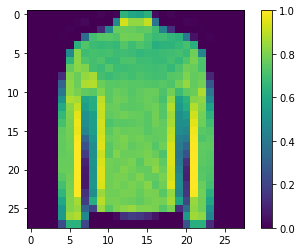

In [7]:
visualize_example(x_train[970])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(7 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [8]:
### Tu código aquí ###

# Se importan las librerías necesarias para una red neuranal en Keras

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers

# Se definen las caratacterísticas de la red neuronal para el proceso de entrenamiento.

batch_size = 64
num_classes = 10
epochs = 20

# Se crean los conjuntos de train y test a partir de los datos de fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Se preparan los datos de train y test para que sean compatibles con keras
# Primero se define el tamaño de los arrays
# Después de transforma el tipo de dato a float para que funcionen en Keras

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Se normalizan los datos en valores entre 0 y 1

x_train = x_train / 255.0
x_test = x_test / 255.0

# Se convierten los conjuntos train y test que contienen las clases, a tipo categóricas

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Se crea la arquitectura de la red neuronal
# Con 784 (28x28) inputs que provienen de cada píxel de las imágenes
# Con 2 capas ocultas de 128 y 64 neuronas
# Con funciones de activación sigmoideas
# Con Dropout() para regularizar el modelo y ayudar a la red a evitar el sobreajuste de los datos
# Con la última capa de tipo softmax para representarlos como funciones de probabilidad

model = Sequential()
model.add(Dense(128, activation = 'sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Se observa una descripción de la arquitectura de la red neuronal

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Se utiliza como optimizador de la red el sdg (stochastic gradient descent)

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Se compila el modelo para la red neuronal. Se establece que la métrica de evaluación sea la exactitud (accuracy)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

# Se entrena la red neuronal y se observa en pantalla los resultados de loss y accuracy por cada epoch

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(1 punto)* **. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [10]:
### Tu código aquí ###

# Para obtener el accuracy resultante utilizamos la función evaluate() de keras.
# Se aplica la función sobre los conjuntos de test

score = model.evaluate(x_test, y_test, verbose=0)

# Se imprime en pantalla los resultados del modelo

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4111044418334961
Test accuracy: 0.8497


**Pregunta 3.2 *(1 punto)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [11]:
### Tu código aquí ###

from decimal import Decimal

# Se aplica el método predict() sobre el conjunto de x_test

predict = model.predict(x_test, batch_size=None, verbose=0, steps=None)

# Se observan las dimensiones del array predict

print("Dimensiones del array predict: " + str(predict.shape) + "\n")

# Se observan todos los elementos del array predict

print("Todos los elementos del array predict: \n" + str(predict.round(2)) + "\n")

# Se obtiene una muestra del array predict

print("Una muestra del array predict: \n" + str(predict[1].round(2)))

Dimensiones del array predict: (10000, 10)

Todos los elementos del array predict: 
[[0.   0.   0.   ... 0.19 0.   0.73]
 [0.   0.   0.95 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.01 0.   0.   ... 0.   0.97 0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.05 0.   0.  ]]

Una muestra del array predict: 
[0.   0.   0.95 0.   0.   0.   0.05 0.   0.   0.  ]


*Tu respuesta aquí*

Como podemos observar la salida del método predict() es un array de 10000 filas por 10 columnas. Esta función evalúa el modelo con muestras de test que nunca ha visto y la salida es una distrubución de probabilidad con los valores de probabilidad de cada clase. Si sacamos una muestra del array, por ejemplo: la muestra predict[1], vemos que la salida es un array con probabilidades de que sea la imagen de cierta clase. En este ejemplo observamos que la mayor probabilidad cae sobre la clase 2 con 0.97 por ciento de probabilidad. 

Esto se da porque la última capa utiliza una función softmax que normaliza las salidas entre 0 y 1 asignando probabilidades decimales a cada clase en un caso de clases múltiples. Estas probabilidades suman 1. Se utiliza en problemas de clases excluyentes o en donde solo una clase es posible.